In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

data = pd.read_csv('Data_Clean/posts_full.csv', index_col=0)
data.head()

,article_host,article_name,article_subtitle,hashtags,img-label,img_src,linked_profiles,links,text,timestamp,...,work,achiev,leisure,home,money,relig,death,assent,nonflu,filler
0,vaxopedia.org,Is the CDC Pushing Vaccines Because a Batch of...,Guess when the latest batches of MMR expire?,[],No photo description available.,./About Pediatrics and Parenting Advice - Post...,NaN,[],The latest conspiracy theory is that MMR vacci...,2019-03-31 16:29:00,...,0.275862,0.103448,0.241379,0.068966,0.103448,0.241379,0.034483,0.068966,0.068966,0.00
1,keepkidshealthy.com,The New Vaccine Surveillance Network Report on...,Anyone who has been following the outbreaks of...,[],Sadio Mane has revealed he hates watching Man ...,./About Pediatrics and Parenting Advice - Post...,NaN,[],The New Vaccine Surveillance Network Report on...,2019-03-28 13:07:00,...,0.300000,0.100000,0.200000,0.100000,0.100000,0.200000,0.100000,0.100000,0.000000,0.00
2,sccgov.org,Public Health Department Warns of Possible Mea...,The County of Santa Clara Public Health Depart...,['measles'],NaN,NaN,NaN,[],"Someone with in Santa Clara County, #Californ...",2019-03-27 14:36:00,...,0.080000,0.080000,0.160000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.00
3,vaxopedia.org,News on the Latest Measles Outbreaks of 2019,Get vaccinated and stop the measles outbreaks.,[],Image may contain: one or more people and peop...,./About Pediatrics and Parenting Advice - Post...,NaN,[],"There are 33 new measles cases in Brooklyn, br...",2019-03-27 14:14:00,...,0.214286,0.142857,0.250000,0.035714,0.107143,0.071429,0.035714,0.000000,0.000000,0.00
4,vaxopedia.org,The CDC Vaccine Price List Conspiracy,Did you believe this one?,[],No photo description available.,./About Pediatrics and Parenting Advice - Post...,NaN,[],It took less a few minutes to debunk the lates...,2019-03-27 13:32:00,...,0.150000,0.150000,0.200000,0.100000,0.100000,0.150000,0.100000,0.050000,0.000000,0.05


# Analyze Simplest (Lower Readability) Posts

In [59]:
data['text'] = data.text.str.strip().apply(lambda x: x if type(x) == str and len(x) > 0 else '')
data['has_text'] = data.text.apply(lambda x: len(x) > 0)
anti_vaxx_rows = data.loc[data.anti_vax]
anti_vaxx_rows.loc[data.has_text, ['readability_flesch_kincaid_grade', 'text']].sort_values(
    'readability_flesch_kincaid_grade', ascending=True).head(10)

,readability_flesch_kincaid_grade,text
24796,-15.7,:'(
60386,-15.7,#
26081,-15.7,.
77298,-15.7,#
36775,-15.7,#
36817,-15.7,#
26240,-15.7,.
85416,-15.7,#
26236,-15.7,.
3001,-15.7,$$$$


In [52]:
# Only interested in posts that have text
rows_with_text = data.loc[data['has_text']]
# Calculate mean of columns
means_with_text = rows_with_text.groupby('anti_vax').mean()
readability_means_with_text = means_with_text[[c for c in means_with_text.columns if c.startswith('readab')]]
readability_means_with_text.transpose()

anti_vax,False,True
readability_smog_index,2.340957,4.451113
readability_gunning_fog,9.817244,12.874536
readability_flesch_kincaid_grade,8.484632,12.173828


# Plot Readability

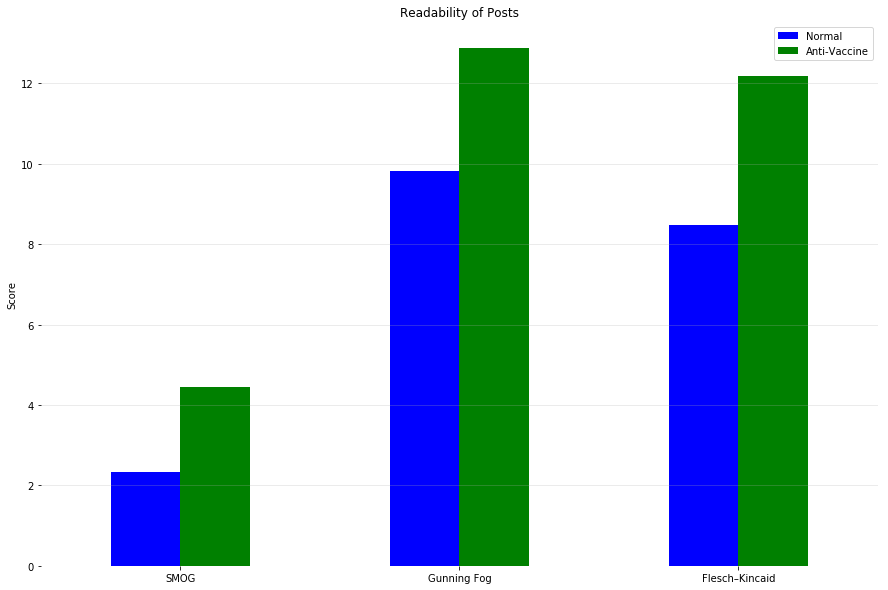

In [53]:
ax = readability_means_with_text.transpose().plot(kind='bar', figsize=(15, 10), color=['b', 'g'], rot=0)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.yaxis.grid(True, alpha=0.3)
ax.legend(handles=[mpatches.Patch(facecolor='b', label='Normal'), 
                   mpatches.Patch(facecolor='g', label='Anti-Vaccine')])
ax.set_title('Readability of Posts')
ax.set_ylabel('Score')
ax.set_xticklabels(('SMOG', 'Gunning Fog', 'Flesch–Kincaid'));

# Plot Sentiment

In [54]:
sentiment_means_with_text = means_with_text[[c for c in means_with_text.columns if c.startswith('sentiment')]]
sentiment_means_with_text.transpose()

anti_vax,False,True
sentiment_neg,0.046284,0.087218
sentiment_neu,0.776952,0.803070
sentiment_pos,0.172740,0.107095
sentiment_compound,0.328004,0.043750


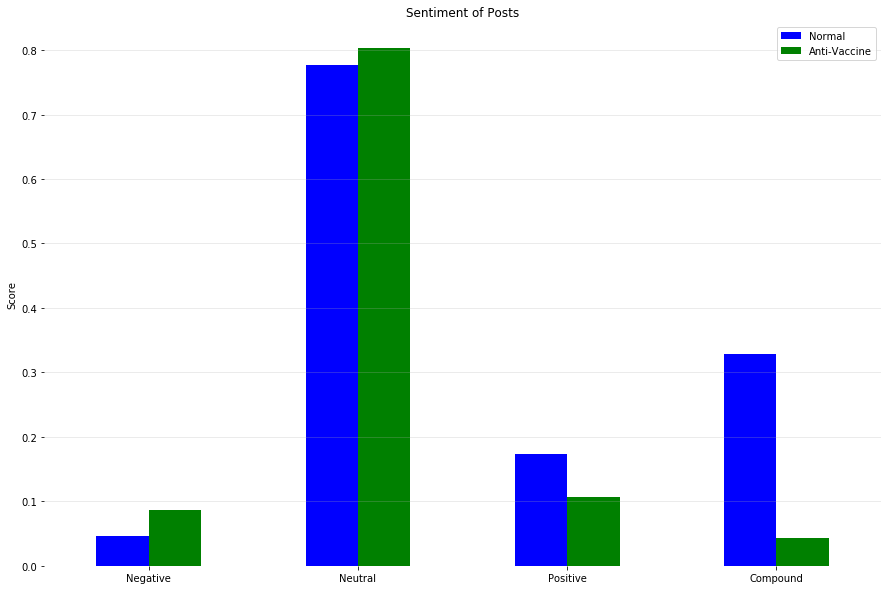

In [55]:
ax = sentiment_means_with_text.transpose().plot(kind='bar', figsize=(15, 10), color=['b', 'g'], rot=0)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.yaxis.grid(True, alpha=0.3)
ax.legend(handles=[mpatches.Patch(facecolor='b', label='Normal'), 
                   mpatches.Patch(facecolor='g', label='Anti-Vaccine')])
ax.set_title('Sentiment of Posts')
ax.set_ylabel('Score')
ax.set_xticklabels(('Negative', 'Neutral', 'Positive', 'Compound'));